# A/B Testing Marketing campaign.

**Problem Statement**: Cookie Cats is a popular mobile puzzle game developed by Tactile Entertainment(on IOS and Android) where players merge cookies of the same colour to clear through levels and progress in the game. 

When new players join the game, they will automatically be assigned to 2 versions of the game, one with the gate level 30 (control group) and one with the gate level 40 (experimental group).

As a Marketing Analyst, I seek to find out:

1. Whether moving the gate impacts Day 1 and Day 7's retention rates.
2. If the observed differences are **statistically significant**, and if so,
4. Whether the changes are **practically significant** enough to justify implementation in the actual game.


_Note: This dataset was originally provided by DataCamp. It was made publicly available on Kaggle by publisher Murside Yarkin._

Kaggle Dataset: https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats

## Data Dictionary

This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

**Content**
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. **userid:** A unique number that identifies each player.
2. **version:** Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
3. **sum_gamerounds:** the number of game rounds played by the player during the first 14 days after install.
4. **retention_1:** Did the player come back and play 1 day after installing?
5. **retention_7:** Did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either.

## Hypothesis: 
(gate 30 = control group, 
gate 40 = experimental group)

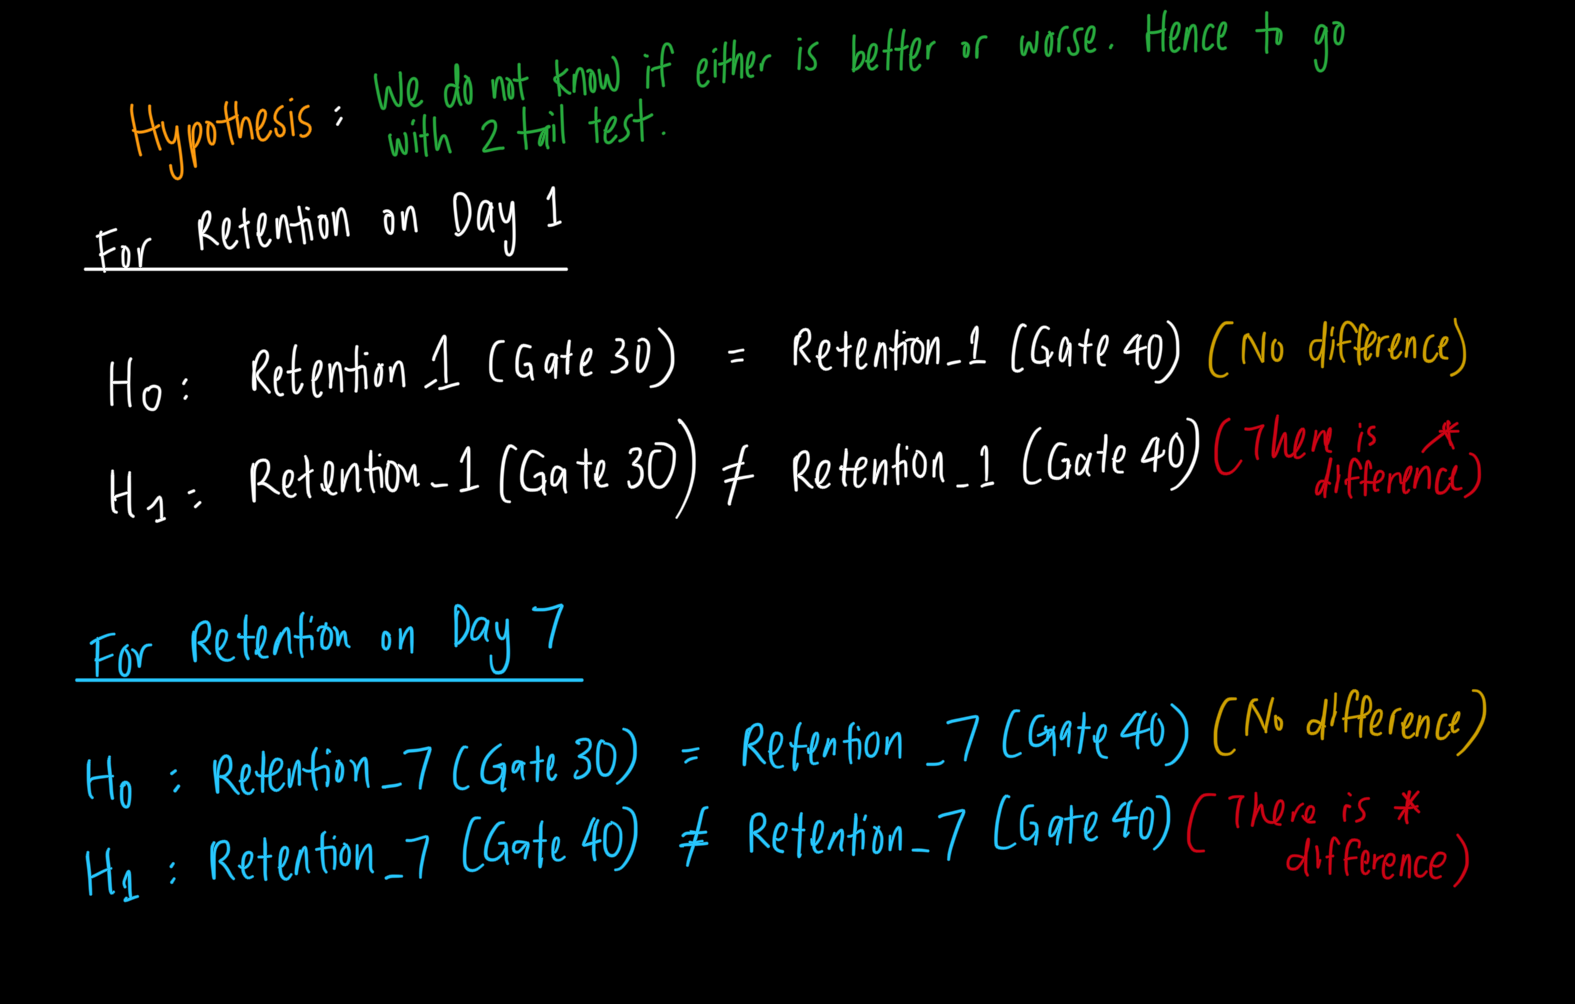

I am not sure if changing the gates to level 40 for new players causes any effect positively or negatively on player retention. Hence I have adopted the approach to take a neutral stance and make an objective decision based on the data without assuming that moving to gate 40 results in any improvement. Hence I chose a two tailed test for this AB testing case.

I want to know if H1 is not just different, but **statistically and practically significantly different.**

In [19]:
# Load libraries

import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Loading our Conversion / Retention Data for AB Test

df_abtest = pd.read_csv('/Users/ashyenen/Desktop/Desktop/Capstone Projects/3) AB Testing Project Python (Control vs Experiment)/cookie_cats.csv')

# Display the first few rows of dataframe to confirm proper loading:

print(df_abtest.head())
print(df_abtest.describe())
print(df_abtest.shape)   #90,189 rows, 5 columns


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000
(90189, 5)


In [32]:
df_abtest.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [25]:
# Are all values in userid unique?
print(df_abtest['userid'].is_unique)

# Are there only 2 types of groups in 'version'? (Exp and control)
print(df_abtest['version'].nunique() == 2)

# Are there only binary False and True in retention_1 and retention_7?

print((df_abtest['retention_1'].unique() == [0, 1]).all())

print((df_abtest['retention_7'].unique() == [0, 1]).all())

True
True
True
True


### Check if the 2 groups are about the same size.

version
gate_40    50.437415
gate_30    49.562585
Name: count, dtype: float64


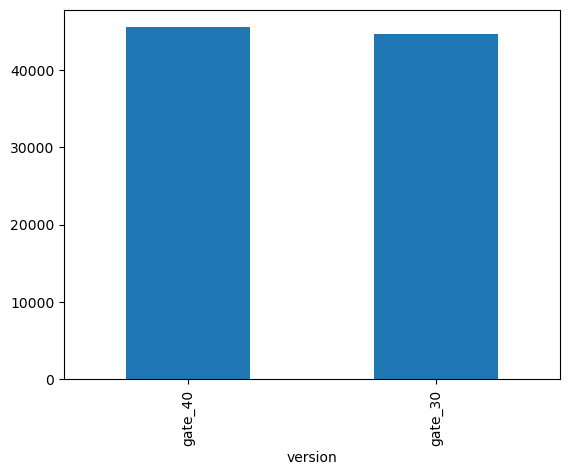

In [28]:
# Print out the percentage of users in each group
print(df_abtest['version'].value_counts() / df_abtest['version'].count() * 100)

# Plot the distribution of users in each group.
df_abtest['version'].value_counts().plot(kind='bar');

In [34]:
# Convert both retention_1 and 7 to 1 and 0 (numeric)

df_abtest['retention_1'] = df_abtest['retention_1'].astype(int)
df_abtest['retention_7'] = df_abtest['retention_7'].astype(int)


In [89]:
print(df_abtest.describe())

print(df_abtest.groupby('version').sum('retention_1'))  # this sums up the binary variables (0 and 1), where 0 is false and 1 is true.

# The code above sums up the people who were retained in retention 1 and 7. (As 0 + 0 is still 0, we only sum up the 1s.)

# We see that in gate 30, 20034 players played 1 day after installing. 8502 players played 7 days after installing.

# In gate 40, 20119 players played 1 day after installing, and 8279 players played 7 days after installing.

print(df_abtest.groupby('version')['version'].count())

             userid  sum_gamerounds   retention_1   retention_7
count  9.018900e+04    90189.000000  90189.000000  90189.000000
mean   4.998412e+06       51.872457      0.445210      0.186065
std    2.883286e+06      195.050858      0.496992      0.389161
min    1.160000e+02        0.000000      0.000000      0.000000
25%    2.512230e+06        5.000000      0.000000      0.000000
50%    4.995815e+06       16.000000      0.000000      0.000000
75%    7.496452e+06       51.000000      1.000000      0.000000
max    9.999861e+06    49854.000000      1.000000      1.000000
               userid  sum_gamerounds  retention_1  retention_7
version                                                        
gate_30  222944098441         2344795        20034         8502
gate_40  227857702576         2333530        20119         8279
version
gate_30    44700
gate_40    45489
Name: version, dtype: int64


## Validity Checks

### A/A Test

To check for selection biases and ensure my control and experimental groups are homogeneous.

In [126]:
# Filter only gate_30 users (since no treatment difference yet)
gate_30_df = df_abtest[df_abtest['version'] == 'gate_30']

# Randomly assign A/A groups from gate_30 users
np.random.seed(42) # for reproducibility
gate_30_df['aa_group'] = np.random.choice(['A1', 'A2'], size=len(gate_30_df))

gate_30_df['aa_group'].value_counts()

/var/folders/9j/x2pc1fss0cx2cwvy98t9g8n00000gn/T/ipykernel_36705/3202303145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gate_30_df['aa_group'] = np.random.choice(['A1', 'A2'], size=len(gate_30_df))


aa_group
A2    22363
A1    22337
Name: count, dtype: int64

Result for aa_group after the assignment is normal since it randomly assigns each player to group A1 or A2 with a 50/50 chance.



### Chi-Square Goodness of Fit Test
1. Do the actual group sizes match what I expected?
2. If p-value > 0.05, no significant difference and randomization is working. No selection bias.

3. If p-value < 0.05, possible bias or uneven distribution. Possible data leakage or flawed assignment.

In [132]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(gate_30_df['aa_group'], gate_30_df['retention_1'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square: 3.0408
P-value: 0.0812


Chi-square = 3.0408, some difference exist but very small.

p-value = 0.0812 larger than 0.05, not significant.

Great! There is no statistically significant difference in the distribution of the metric (retention_1) between my A1 and A2 groups. This supports the assumption that randomization was successful and there's no selection bias.

### A simple bar chart showing the total retentions vs non-retention in each group can provide a clear visual comparison of user retention. 

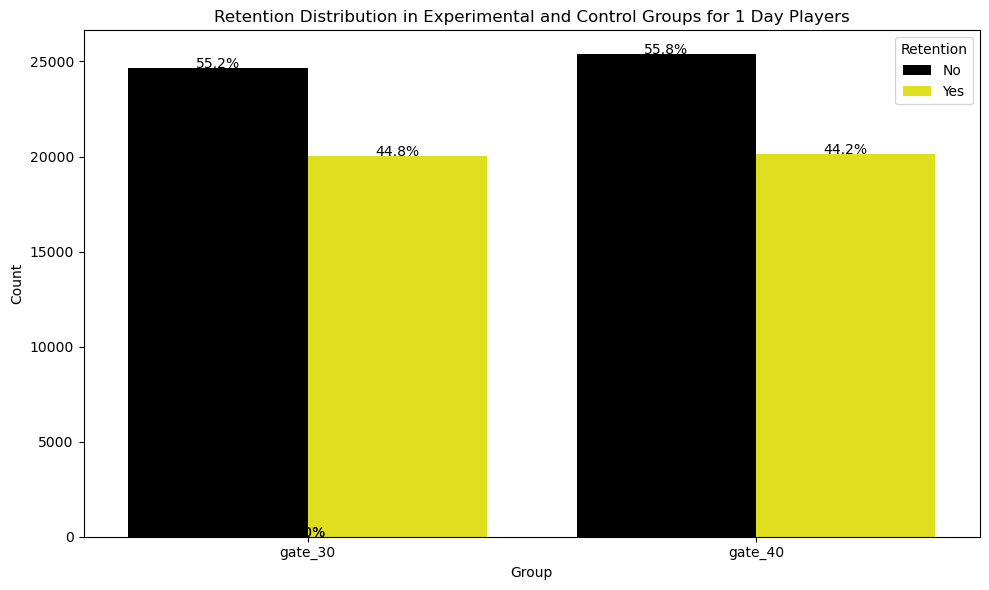

In [142]:
# Custom palette for yellow and black
palette = {0: 'black', 1: 'yellow'}  # Assume 0 is for left, 1 is retained.

# Plotting the retention distribution for each group with the custom colours
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='version', hue='retention_1', data=df_abtest, palette=palette)  #group and count the retention (yes or no)
plt.title('Retention Distribution in Experimental and Control Groups for 1 Day Players')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Retention', labels=['No', 'Yes'])

# Calculate the percentages to plot and annotate the bars
group_counts = df_abtest.groupby(['version']).size()
group_retention_counts = df_abtest.groupby(['version', 'retention_1']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    # Find the group and retention type for the current bar
    group = 'gate_30' if p.get_x() < 0.5 else 'gate_40'
    retention = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage:.1f}%', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

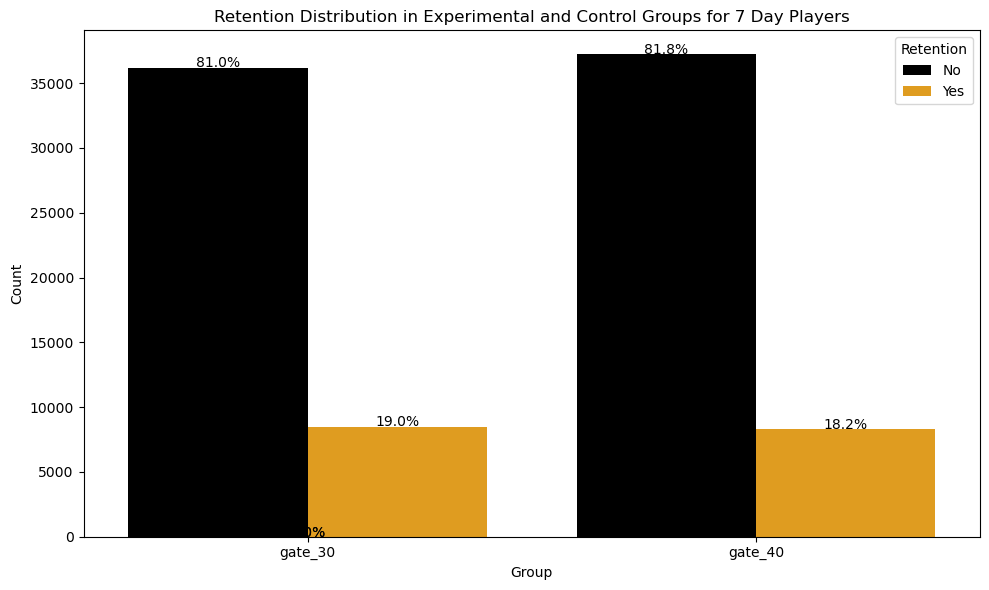

In [81]:
# Custom palette for yellow and black
palette = {0: 'black', 1: 'orange'}  # Assume 0 is for left, 1 is retained.

# Plotting the retention distribution for each group with the custom colours
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='version', hue='retention_7', data=df_abtest, palette=palette)
plt.title('Retention Distribution in Experimental and Control Groups for 7 Day Players')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Retention', labels=['No', 'Yes'])

# Calculate the percentages to plot and annotate the bars
group_counts = df_abtest.groupby(['version']).size()
group_retention_counts = df_abtest.groupby(['version', 'retention_7']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    # Find the group and retention type for the current bar
    group = 'gate_30' if p.get_x() < 0.5 else 'gate_40'
    retention = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage:.1f}%', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

After counting and providing a visualisation of how many users came back and how many did not for both day 1 and day 7 respectively, we are able to quickly see which version (Gate 30 or gate 40) performs better in retaining players.

There is a clear difference in retention on Day 1 players for both gates 30 and 40, which seems to be performing a lot better at keeping players compared to the ones on day 7. 

However, for both gates 30 and 40 on each day (1 and 7), the results are relatively similar. To truly find out there is a difference, we will proceed with conducting the AB test.

### Observe the distribution of game rounds played by Players in first 14 days after Installing.

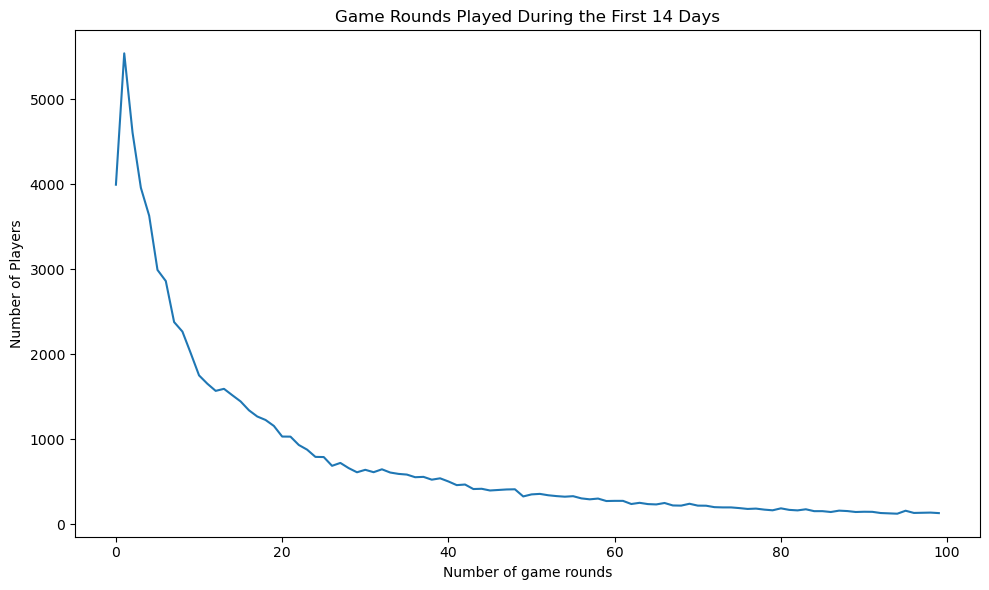

In [139]:
# plot the distribution of the game rounds played 

df_plot = df_abtest.groupby('sum_gamerounds').count().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='sum_gamerounds', y='userid', data=df_plot.head(n=100)) #focus on first 100 unique rounds activities
ax.set_xlabel('Number of game rounds')
ax.set_ylabel('Number of Players')
ax.set_title('Game Rounds Played During the First 14 Days')

plt.tight_layout()
plt.show()

After plotting the distribution of game rounds played in first 14 days, we can see how many players played a certain number of rounds in these 2 weeks, focusing on the first 100 game round levels (to avoid extreme outliers).


**Observation:** 

1. Most players play very few rounds. A sharp peak occurs at the beginning.
2. Over 5000 players played just 1 round.
3. Many players install the game but barely engage, which is pretty typical for mobile games.
4. Rapid drop off: The number of players decrease rapidly as the number of rounds increases. This means lesser and lesser players are playing more rounds, indicating a high early churn.
5. The long tail skewed to the right showed that even beyond 50 to 100 rounds, a small number of players are still active, which showed some kind of dedication and hardcore players still remaining but are rare.


## Parameters of the Model from Power Analysis

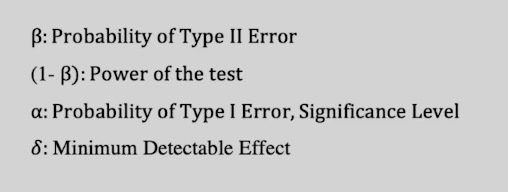

- My probability of type I error is 5% - the amount of error i am comfortable making when i reject my null hypothesis when it is actually true. (Max 5% error).

- 1 - Beta (Power of the test) : The number of times we are CORRECTLY rejecting our null hypothesis and correctly stating that there is indeed a statistically significant difference between our experimental and control group when it is **false**. Industry standard: 80%, but not relevant for my results analysis hence i will not be initialising it in my code. (As used when calcuating minimum sample size)

- Delta: Minimum detectable effect. I have chosen 10%. Besides of having that statistically sigificant difference, I need to know whether that decision is LARGE enough (Practical significance) so that I can inform the business that we are comfortable making this decision to launch the experimental group. (Just knowing statistical significance will not be enough for me.)





In [169]:
# Set the Parameters

alpha = 0.05   # My decision threshold is set at 5%, given i do not have any specific reason to choose a different significance level, hence i went with industry standard 
print('Alpha: significance level is:', alpha)


delta = 0.1 #10% (minimally I want to detect at least a 10% effect / change) With a large sample size, a 10% effect is large.
print('Delta: minimum detectable effect is:', delta)

Alpha: significance level is: 0.05
Delta: minimum detectable effect is: 0.1


## Calculating total number of Retention per group by Summing the retention in both Day 1 and Day 7

In [184]:
# Calculating the total number of retentions per group by summing the retention (Day 1)

N1_con = df_abtest[df_abtest['version']== 'gate_30'].count()
N1_exp = df_abtest[df_abtest['version']== 'gate_40'].count()


X1_con = df_abtest.groupby("version")['retention_1'].sum().loc['gate_30']
X1_exp = df_abtest.groupby('version')['retention_1'].sum().loc['gate_40']

# print this for visibility
print(df_abtest.groupby('version')['retention_1'].sum())
print('Number of users in Gate 30 (con): ', N1_con)
print('Numbe of users in Gate 40 (exp): ', N1_exp)
print('Number of Retention in Gate 30: ', X1_con)
print('Number of Retention in Gate 40: ', X1_exp)


version
gate_30    20034
gate_40    20119
Name: retention_1, dtype: int64
Number of users in Gate 30 (con):  userid            44700
version           44700
sum_gamerounds    44700
retention_1       44700
retention_7       44700
dtype: int64
Numbe of users in Gate 40 (exp):  userid            45489
version           45489
sum_gamerounds    45489
retention_1       45489
retention_7       45489
dtype: int64
Number of Retention in Gate 30:  20034
Number of Retention in Gate 40:  20119


In [186]:
# Calculating the total number of retentions per group by summing the retention (Day 7)

N7_con = df_abtest[df_abtest['version']== 'gate_30'].count()
N7_exp = df_abtest[df_abtest['version']== 'gate_40'].count()

X7_con = df_abtest.groupby("version")['retention_7'].sum().loc['gate_30']
X7_exp = df_abtest.groupby('version')['retention_7'].sum().loc['gate_40']

# print this for visibility
print(df_abtest.groupby('version')['retention_7'].sum())
print('Number of users in Gate 30 (con): ', N7_con)
print('Numbe of users in Gate 40 (exp): ', N7_exp)
print('Number of Retention in Gate 30: ', X7_con)
print('Number of Retention in Gate 40: ', X7_exp)



version
gate_30    8502
gate_40    8279
Name: retention_7, dtype: int64
Number of users in Gate 30 (con):  userid            44700
version           44700
sum_gamerounds    44700
retention_1       44700
retention_7       44700
dtype: int64
Numbe of users in Gate 40 (exp):  userid            45489
version           45489
sum_gamerounds    45489
retention_1       45489
retention_7       45489
dtype: int64
Number of Retention in Gate 30:  8502
Number of Retention in Gate 40:  8279


## Calculating the Pooled Estimates for Retention per Group (For z-test later)

Let's assume that both groups have the true retention rate (null hypothesis is true). What will be that shared rate? We need to combine all retentions from both groups, and divide by the total number of users to get the pooled average retention rate.

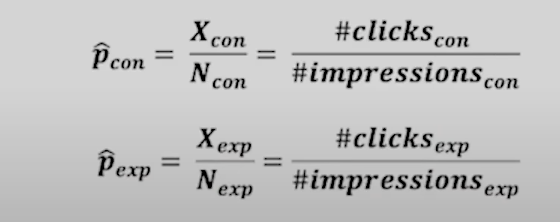

We will need to know the probability of retention in each group on Day 1 and Day 7.

**p_pooled_hat formula:**

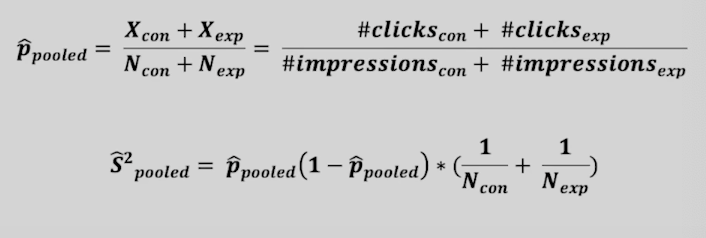

_The reason why I am calculating it manually even though most of the values are in the above descriptive statistics code is because I need a variable that will hold the values for my AB test._

In [220]:
# computing the estimate of retention probability per group. (Day 1)

p_con_hat = X1_con/N1_con
p_exp_hat = X1_exp/N1_exp
print('Retention Probability (Day 1) in Control Group (Gate 30):' , p_con_hat)
print('Retention Probability (Day 1) in Experimental Group (Gate 40): ' , p_exp_hat)


# computing the estimate of pooled retention probability

p_pooled_hat = (X1_con + X1_exp)/(N1_con + N1_exp)
print("Pooled Retention Probability on Day 1:", p_pooled_hat)  # this is the mean of retention_1 users.

Retention Probability (Day 1) in Control Group (Gate 30): userid            0.448188
version           0.448188
sum_gamerounds    0.448188
retention_1       0.448188
retention_7       0.448188
dtype: float64
Retention Probability (Day 1) in Experimental Group (Gate 40):  userid            0.442283
version           0.442283
sum_gamerounds    0.442283
retention_1       0.442283
retention_7       0.442283
dtype: float64
Pooled Retention Probability on Day 1: userid            0.44521
version           0.44521
sum_gamerounds    0.44521
retention_1       0.44521
retention_7       0.44521
dtype: float64


In [204]:
# computing the estimate of retention probability per group. (Day 7)

p7_con_hat = X7_con/N7_con
p7_exp_hat = X7_exp/N7_exp
print('Retention Probability (Day 7) in Control Group (Gate 30):' , p7_con_hat)
print('Retention Probability (Day 7) in Experimental Group (Gate 40): ' , p7_exp_hat)


# computing the estimate of pooled retention probability

p7_pooled_hat = (X7_con + X7_exp)/(N7_con + N7_exp)
print("Pooled Retention Probability on Day 7:", p7_pooled_hat)  # this is the mean of retention_1 users.

Retention Probability (Day 7) in Control Group (Gate 30): userid            0.190201
version           0.190201
sum_gamerounds    0.190201
retention_1       0.190201
retention_7       0.190201
dtype: float64
Retention Probability (Day 7) in Experimental Group (Gate 40):  userid            0.182
version           0.182
sum_gamerounds    0.182
retention_1       0.182
retention_7       0.182
dtype: float64
Pooled Retention Probability on Day 7: userid            0.186065
version           0.186065
sum_gamerounds    0.186065
retention_1       0.186065
retention_7       0.186065
dtype: float64


## Calculating Pooled Variance (How much wiggle room or noise should we expect in the difference between the 2 groups just by chance?) Used to calculate standard error later.

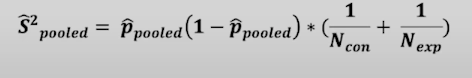

In [224]:
# computing the estimate of pooled variance on Day 1

pooled_variance1 = p_pooled_hat * (1-p_pooled_hat) * (1/N1_con + 1/N1_exp)
print("p^_pooled is: " , p_pooled_hat)
print("pooled_variance on Day 1 is: ", pooled_variance1)

p^_pooled is:  userid            0.44521
version           0.44521
sum_gamerounds    0.44521
retention_1       0.44521
retention_7       0.44521
dtype: float64
pooled_variance on Day 1 is:  userid            0.000011
version           0.000011
sum_gamerounds    0.000011
retention_1       0.000011
retention_7       0.000011
dtype: float64


In [226]:
# computing the estimate of pooled variance on Day 7

pooled_variance7 = p7_pooled_hat * (1-p7_pooled_hat) * (1/N7_con + 1/N7_exp)
print("p^_pooled is: " , p7_pooled_hat)
print("pooled_variance on Day 7 is: ", pooled_variance7)

p^_pooled is:  userid            0.186065
version           0.186065
sum_gamerounds    0.186065
retention_1       0.186065
retention_7       0.186065
dtype: float64
pooled_variance on Day 7 is:  userid            0.000007
version           0.000007
sum_gamerounds    0.000007
retention_1       0.000007
retention_7       0.000007
dtype: float64


## Calculating Standard Error and Test Statistics (Thought Process)

- Because my primary metric is in the choice of 0 or 1. (Retention group).
- Because I know my sample size is large ( > 90,000 users)
- I can make use of the **Central Limit Theorem (CLT)** (> 30 users) and make the conclusion that: ** By making use of the CLT, I can say that my sampling distribution is **normally distributed**.
- Since I made use of the CLT and follows a normal distribution, it does not matter if i use the 2 sample z or t-test. I can utilise either as I will end up with the same conclusion.
- I will go with the 2 sample z-test.

**Standard Error Formula**

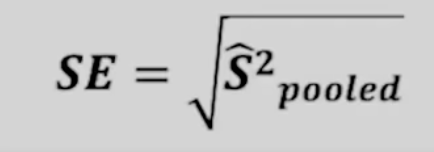


**Test statistic Formula**

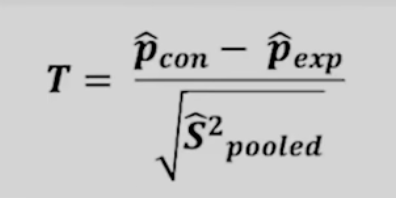


## For Day 1 Players' Retention

In [281]:
# computing the standard error of the test for Day 1:

SE1 = np.sqrt(pooled_variance1)
print("Standard Error is: ", SE1)

# computing the test statistics of the Z-test (if test stat is negative, use the absolute value)
Test_Stat1 = (p_con_hat - p_exp_hat) / SE1  # the motivation behind calculate p control hat and exp hat lies here
print("Test Statistics for 2-sample Z-test for Day 1 is:", Test_Stat1)


# critical value of the Z-test
Z_crit1 = norm.ppf(1-alpha/2)  # divide by 2 because we have a 2 sample 2 sided test. standard formula for standard normal distribution. 1.960
print("Z-critical value from Standard Normal Distribution for Day 1: ", Z_crit1)

Standard Error is:  userid            0.00331
version           0.00331
sum_gamerounds    0.00331
retention_1       0.00331
retention_7       0.00331
dtype: float64
Test Statistics for 2-sample Z-test for Day 1 is: userid            1.784086
version           1.784086
sum_gamerounds    1.784086
retention_1       1.784086
retention_7       1.784086
dtype: float64
Z-critical value from Standard Normal Distribution for Day 1:  1.959963984540054


In [309]:
z = 1.784
p_value = 2 * (1-norm.cdf(z))
print(p_value)  # just checking the p value from z-stat for this 2 tailed test. Bigger than 0.05 alpha, do not reject H0.

# function checking statistical significance
def is_statistical_significance(p_value, alpha):
    """
    We assess whether there is statistical significance based on the p-value and alpha.

    Arguments:
    - p_value (float): The p-value resulting from a statistical test.
    - alpha (float, optional): The significance level threshold used to determine statistical signifiance. Defaults to 0.05.

    Returns:
    - Prints the assessment of statistical significance.
    """

# Print the rounded p-value to 3 decimal place
print(f"P-value of the 2-sample Z-test: {round(p_value, 3)}")


# Determine statistical significance

if p_value <= alpha:
    print("There is A statistical significance, indicating that the observed differences between the groups (Gate 30 & 40) are unlikely to have occurred due to chance alone. This suggests that the changes in the experimental group have a real effect compared to the control group.")
else:
    print("There is NO statistical significance, suggesting that the observed differences between the groups could have occured by chance. This implies that the changes in the experimental group do not have a substantial effect compared to the control group.")
          



0.0744236651594008
P-value of the 2-sample Z-test: 0.074
There is NO statistical significance, suggesting that the observed differences between the groups could have occured by chance. This implies that the changes in the experimental group do not have a substantial effect compared to the control group.


### Since my z-test statistic for Day 1 players is 1.784 < 1.960 (Z-critical value), it does not fall in the rejection region. Therefore, the result is not statistically significant at the 5% level.

## For Day 7 Players' Retention

In [271]:
# computing the standard error of the test for Day 7:

SE7 = np.sqrt(pooled_variance7)
print("Standard Error is: ", SE7)

# computing the test statistics of the Z-test
Test_Stat7 = (p7_con_hat - p7_exp_hat) / SE7  
print("Test Statistics for 2-sample Z-test for Day 7 is:", Test_Stat7)


# critical value of the Z-test
Z_crit7 = norm.ppf(1-alpha/2)  # divide by 2 because we have a 2 sample 2 sided test
print("Z-critical value from Standard Normal Distribution for Day 7: ", Z_crit7)

Standard Error is:  userid            0.002592
version           0.002592
sum_gamerounds    0.002592
retention_1       0.002592
retention_7       0.002592
dtype: float64
Test Statistics for 2-sample Z-test for Day 7 is: userid            3.164359
version           3.164359
sum_gamerounds    3.164359
retention_1       3.164359
retention_7       3.164359
dtype: float64
Z-critical value from Standard Normal Distribution for Day 7:  1.959963984540054


In [311]:
z7 = 3.164359
p_value7 = 2 * (1-norm.cdf(z7))
print(p_value7)   # 0.0015 < 0.05 (alpha), reject H0.


# function checking statistical significance
def is_statistical_significance(p_value7, alpha):
    """
    We assess whether there is statistical significance based on the p-value and alpha.

    Arguments:
    - p_value (float): The p-value resulting from a statistical test.
    - alpha (float, optional): The significance level threshold used to determine statistical signifiance. Defaults to 0.05.

    Returns:
    - Prints the assessment of statistical significance.
    """

# Print the rounded p-value to 3 decimal place
print(f"P-value of the 2-sample Z-test: {round(p_value7, 3)}")


# Determine statistical significance

if p_value7 <= alpha:
    print("There is A statistical significance, indicating that the observed differences between the groups (Gate 30 & 40) are unlikely to have occurred due to chance alone. This suggests that the changes in the experimental group have a real effect compared to the control group.")
else:
    print("There is NO statistical significance, suggesting that the observed differences between the groups could have occured by chance. This implies that the changes in the experimental group do not have a substantial effect compared to the control group.")
          

0.001554249509617689
P-value of the 2-sample Z-test: 0.002
There is A statistical significance, indicating that the observed differences between the groups (Gate 30 & 40) are unlikely to have occurred due to chance alone. This suggests that the changes in the experimental group have a real effect compared to the control group.


### My z-test statistic for Day 7 players is 3.164 > 1.960 (z- critical value). It falls within the rejection region. There is a statistically significant difference in Day 7 retention between Gate 30 and Gate 40. The p-value is 0.0015 less than 0.05. This confirms the results and the difference is unlikely to be due to random chance.

## Previously we calculated the p_values of the Z-test for each Days.

- A low p-value (p ≤ 0.05 at 5% significance level) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
- A high p-value (p > 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.

### **P-value for Day 1:** 0.0744   (Greater than 0.05. We **do not reject** the null hypothesis.) There is no statistical significance in the difference in gates. (The difference is likely due to chance) This means we do not have strong enough evidence to conclude that Gate 30 and Gate 40 lead to different Day 1 retention rates.


### **P-value for Day 7:** 0.00155 (Lesser than 0.05. There is strong evidence **to reject** the null hypothesis and conclude there is statistical significant difference in Day 7 rentention between Gate 30 and Gate 40 levels. There is a real effect on experimental group (Gate 40) compared to the control group (Gate 30).


## Let's plot Day 7's Retention Findings in the form of a Visual 

## Gaussian Distribution (Aka Standard Normal Distribution with Rejection Region)

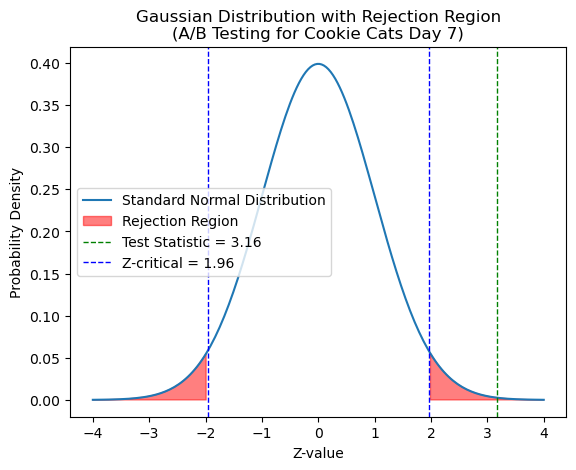

In [370]:
# Extract scalar value from the 'retention_7' column
Test_Stat7_value = Test_Stat7['retention_7']

# Standard normal distribution parameters
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > Z_crit7) | (x < -Z_crit7), color='red', alpha=0.5, label='Rejection Region')

# Plot the test statistic
plt.axvline(Test_Stat7_value, color='green', linestyle='dashed', linewidth=1, label=f'Test Statistic = {Test_Stat7_value:.2f}')

# Adding Z-critical values
plt.axvline(Z_crit7, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit7:.2f}')
plt.axvline(-Z_crit7, color='blue', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region\n(A/B Testing for Cookie Cats Day 7)')
plt.legend()
plt.show()

## Observation for Day 7:

- The Z-distribution Gaussian curve shows if there's meaningful difference between Gate 30 and 40.
- The red shaded areas (rejection regions) in extreme zone tells me that if my test statistic (green line) falls into these areas, we reject the idea that both groups are the same. 
- In my graph, my green dashed line is 3.16 (Z-test statistic). This tells me how far my results are from average, in terms of standard deviations.
- My Z-test statistic falls falls well within the red shaded rejection zone, this means I have **strong evidence that Gate 40 and Gate 30 have different Day 7 retention rates.** (If it were to fall somewhere in the middle around 0, then it would be the case of Day 1)

- Although the closer the test statistic is to 1.96 (Z-critical value), the weaker the evidence.
- However, the test statistic of 3.16 is still statistically significant and quite strong and the effect is real and not random. 

## Calculating Confidence Interval of the Tests 

### (To help me make comments regarding the quality of my test, its generalizability, entire population and the accuracy of my results. I will use this confidence interval to also test for the practical significance later.)

Even though we know that Day 1's result is not statistically significant, and it is not necessary to further check for practical significance and confidence level from a pure statistical decision-making perspective, I will calculate it here as a last step to show **how small or close the difference is** for thoroughness purpose.

**Formula for CI:**

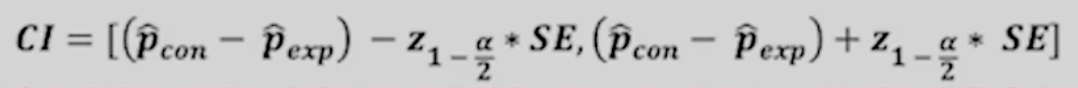

In [334]:
# Day 1's Retention
# Calculate the Confidence Interval (CI) for a 2 sample Z-test
## Calculate the lower and upper bounds of the confidence interval

CI1 =  [
    round((p_exp_hat - p_con_hat) - SE1*Z_crit1, 3), # Lower bound of CI, rounded to 3 decimal places
    round((p_exp_hat - p_con_hat) + SE1*Z_crit1, 3)  # Upper bound of CI, rounded to 3 decimal places

]

# Here, the confidence interval provides a range of values within the true difference between the experimental and control group proportions is likely to lie within a certain level of confidence (e.g., 95%)

# Cleanly extract the CI just for the 'retention_1' column
clean_CI1 = [CI1[0]['retention_1'], CI1[1]['retention_1']]
print("Confidence Interval (Day 1 retention only):", clean_CI1)

Confidence Interval (Day 1 retention only): [-0.012, 0.001]


In [348]:
# Day 7's Retention
# Calculate the Confidence Interval (CI) for a 2 sample Z-test
## Calculate the lower and upper bounds of the confidence interval

CI7 =  [
    round((p7_exp_hat - p7_con_hat) - SE7*Z_crit1, 3), # Lower bound of CI, rounded to 3 decimal places
    round((p7_exp_hat - p7_con_hat) + SE7*Z_crit1, 3)  # Upper bound of CI, rounded to 3 decimal places

]

# Here, the confidence interval provides a range of values within the true difference between the experimental and control group proportions is likely to lie within a certain level of confidence (e.g., 95%)

# Cleanly extract the CI just for the 'retention_7' column
clean_CI7 = [CI7[0]['retention_7'], CI7[1]['retention_7']]
print("Confidence Interval (Day 7 retention only):", clean_CI7)



Confidence Interval (Day 7 retention only): [-0.013, -0.003]


## Confidence Level Interpretation:

- Both Day 1 and Day 7 Confidence Intervals are relatively narrow.
- However, Day 1's CI **includes 0**, it is not statistically significant. [-0.012 to 0.001 range] (We already know that and this confirms it)
- Day 7's confidence level is between -0.013 to -0.003, which is narrow too.
- We are fairly confident that the true difference lies within a small negative range, meaning Gate 40 leads to lower retention. This strengthens the trust in my finding.
- Practical Significance for Day 1? No.
- Practical Significance for Day 7? Maybe. If a 0.3% to 1.3% drop in retention is meaningful to Cookie Cats (e.g. loss of potential paying users, or churn impact), then it is practically significant too.

- The entire interval is negative, indicating that the experimental group performed worse than the control group.
- This effect is real and not due to random chance.

### **Interpretation: We are 95% confident that Gate 40's retention rate is between 0.3% and 1.3% lower than Gate 30's for Day 7 Players.**

## Testing for Practical Significance in A/B Testing

_Although the confidence interval for Day 7 retention was entirely negative suggesting Gate 40 underperforms gate 30, i still conducted a practical significance test to evaluate whether the observed drop was substantial enough to warrant any product or engineering intervention to showcase the critical steps in real A/B testing (to ensure decisions are not just statistically valid but also practical and business relevant)_

## So far, I found:

- **A difference, but it is small.** My test proved that moving gate to 40 does cause a drop in Day 7 retention compared to gate 30 (Statistical significance)
- **How Smalll?** Drop is between 0.3% and 1.3%. That's a pretty small change.
- **The crucial question:** Is the small drop **important** enough to actually advise Cookie Cats to change their game?
- Is 0.3% to 1.3% a big deal for Cookie cats?
- What is the cost of changing back to gate 30? Is it a tiny configuration or huge development effort? Any other factors?

- Under typical circumstances when the entire CI interval is negative, it represents worse performance and is sometimes not necessary to further test for practical significance. However, for this case, since the drop is relatively small, and considering the business circumstances (cost of switching, etc), testing for practical significance is necessary here.

In [443]:
# Define your delta and CI_95 again

delta = 0.1   #10% MDE threshold
CI_95 = (-0.013, -0.003)  # My actual 95% confidence interval (Tuple)

In [445]:
def is_Practically_significant(delta, CI_95):
    
        """ 
        We assess here if the difference between Control and Experimental group is practically significant using the Minimum Detectable Effect (MDE) parameter from the Power Analysis.

        Arguments:
        - delta (float): The Minimum Detectable Effect (MDE) considered for practical significance .
        - CI_95 (tuple): A tuple representing the lower and upper bounds of the 95% confidence interval.

        Returns:
        - Prints whether the experiment has practical significance based on the MDE and CI.
        """
       # Extract lower bound of 95% confidence interval
        lower_bound_CI = CI_95[0]  # Extract the lower bound from the tuple CI_95

    # Check if the lower bound of the CI is greater than or equal to delta
        if lower_bound_CI >= delta:
            print(f"We have practical significance! \nWith MDE of {delta}, The difference between Control and Experimental group is practically significant.")
            return True
        else:
            print("We don't have practical signficance! \nThe difference between Control and Experimental group is not practically significant.")
            return False

# Call the function
signficance = is_Practically_significant(delta, CI_95)
print("Lower bound of 95% confidence interval is:", CI_95[0])




We don't have practical signficance! 
The difference between Control and Experimental group is not practically significant.
Lower bound of 95% confidence interval is: -0.013


## Conclusion:

From both a statistical and practical standpoint, **changing the gate from 30 to 40 does not lead to meaningful improvements in player retention.**

While the A/B test for Day 7 retention showed a statistically significant difference (pvalue = 0.002), the observed drop in retention ranged from 0.3% to 1.3%, well below our MDE of 10%. This means that although Gate 40 underperforms Gate 30 slightly, the impact is **too small to justify any engineering effort** or product changes based on this test alone.

### But Should Cookie Cats Revert the Gate?

Rather than reverting, it may be more productive to scrap the Gate 40 idea altogether and rethink retention strategies more hollistically. We know that retention naturally declines as players progress further into the game, likely due to player fatigue, repetitive mechanics, perhaps difficulty spikes, or even insufficient game rewards.

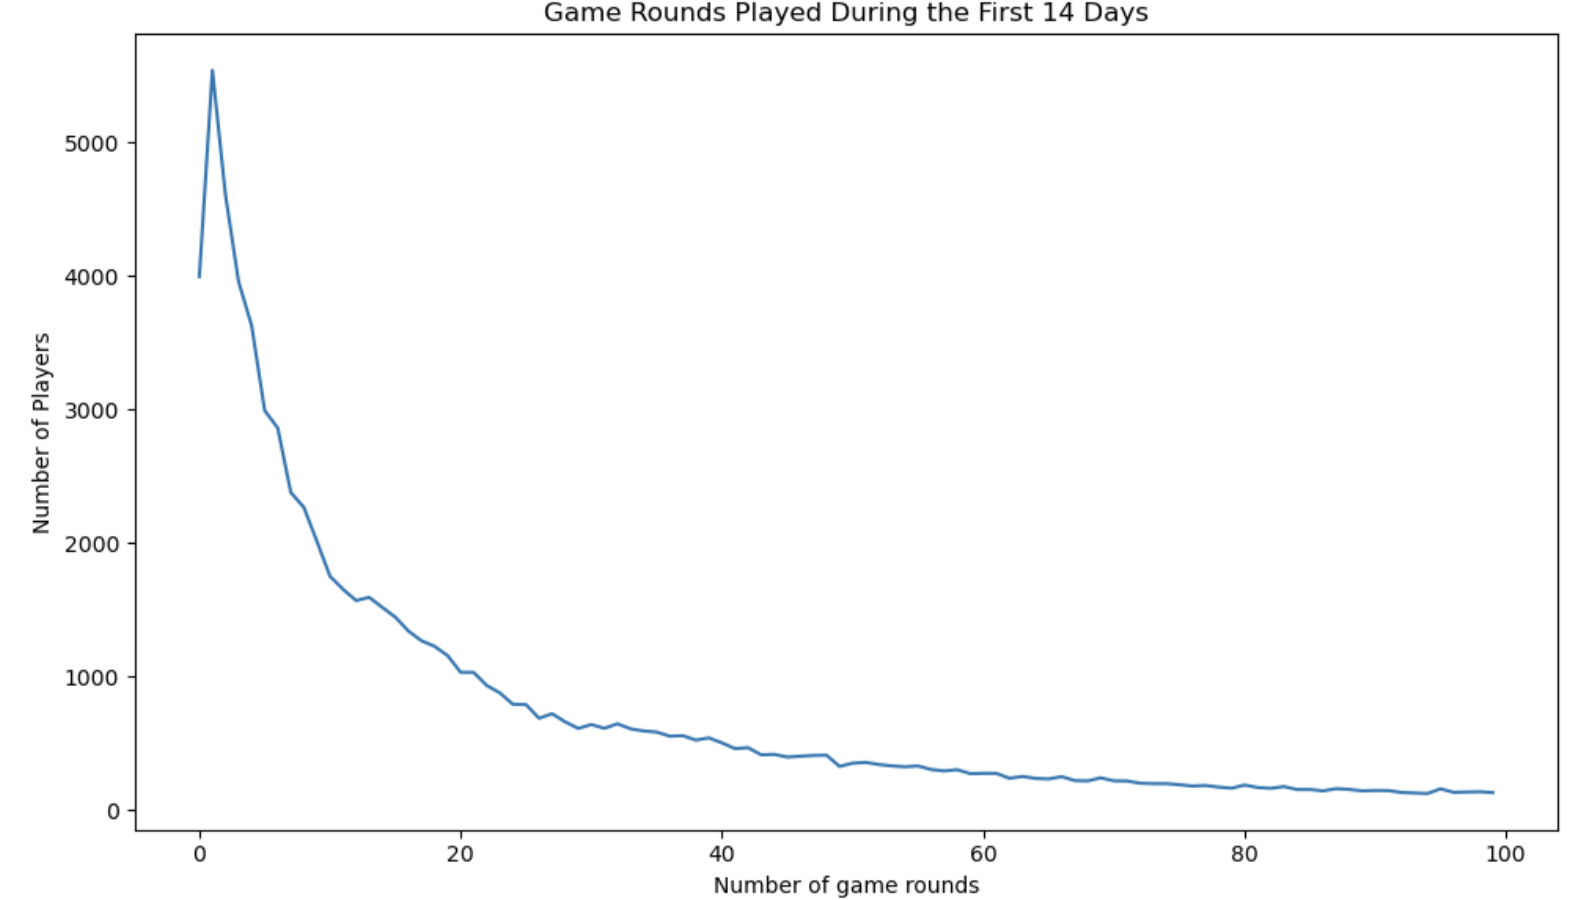

If players disengage after more rounds regardless of where the gate is placed, then the problem likely lies not in the gate position, but in broader areas like:

- Game design flow (Well too boring and repetitive)
- Progression pacing
- Rewards systems
- Level of difficulty and balanced
- Overall gameplay experience

These could even play a bigger role in sustaining player retention beyond day 7. 


## Recommendation:

Instead of focusing just on gate placements, Cookie Cats can consider looking at user feedback from app store reviews to understand any pain points, behavioural data such as session length and churn points, or even new AB tests targeting gameplay features and rewards. Using Bayesian AB testing or bootstrap analysis could also help refine estimates and reduce uncertainty in future experiments.

